In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## **EDA**

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

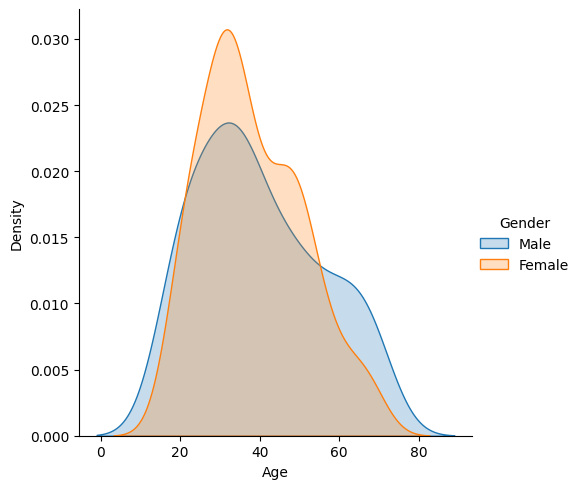

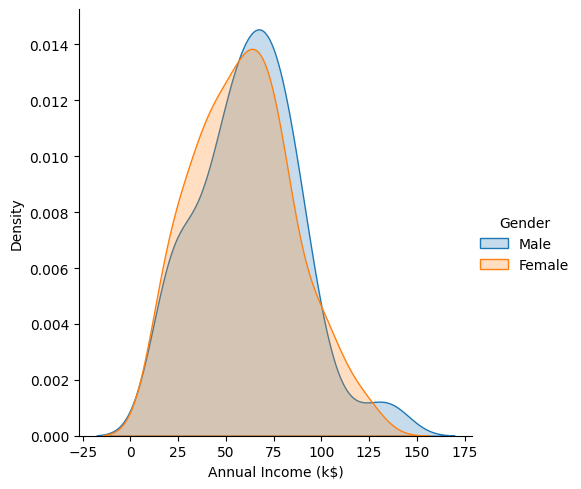

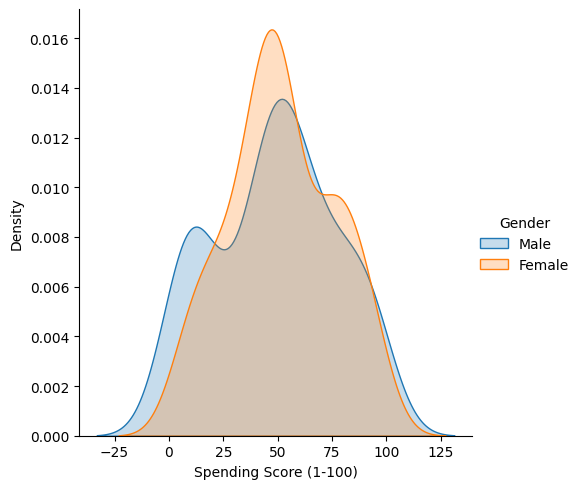

In [6]:

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    g = sns.FacetGrid(df, hue='Gender', height=5)
    g.map(sns.kdeplot, i, shade=True)
    g.add_legend()
    plt.show()


We can see that our plotted variables are normally distributed.

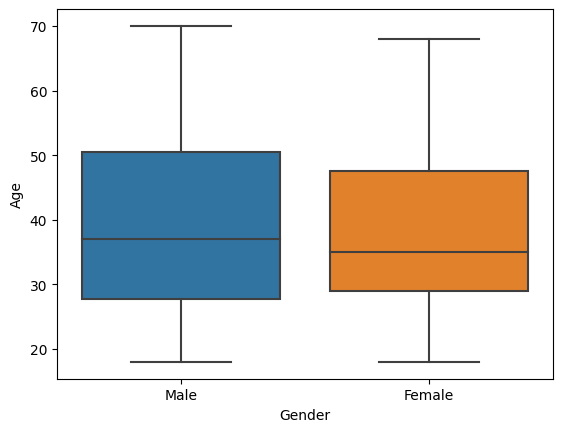

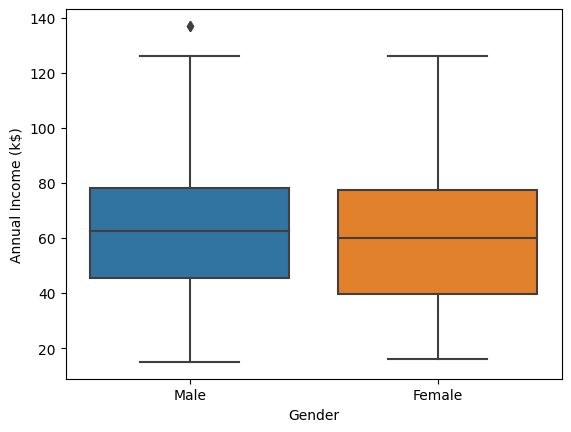

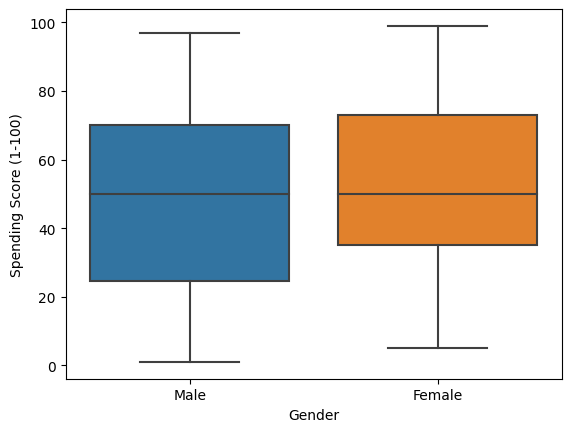

In [7]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']

for i in columns:
  plt.figure()
  sns.boxplot(data=df, x='Gender',y= df[i])

By utilizing boxplot representations, we gain valuable insights into our variables from various perspectives. Upon analysis, we observe that the Annual Income variable contains an outlier, indicating a deviation from the overall pattern. Additionally, we noticed that the median values for both genders are similar across the three studied variables. However, the scores of these variables differ between male and female individuals, highlighting gender-based distinctions. These findings provide a comprehensive understanding of the data and its gender-related characteristics. To have a better understanding:

In [8]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

In [9]:
df=df.drop('CustomerID',axis=1)

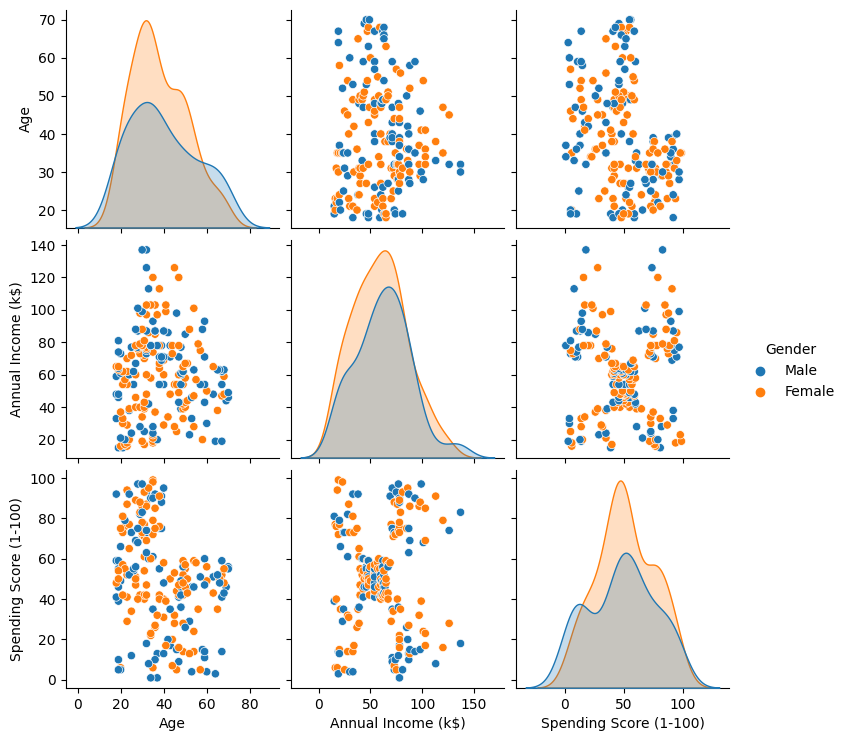

In [10]:
sns.pairplot(df,hue='Gender')

We can see that some of the segments appear in the plotted visuals. Let's keep investigating. 

In [11]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


We notice that the Male mean for the variables age and annual income is higher than the Female mean. However, females tend to spend more than males.

<Axes: >

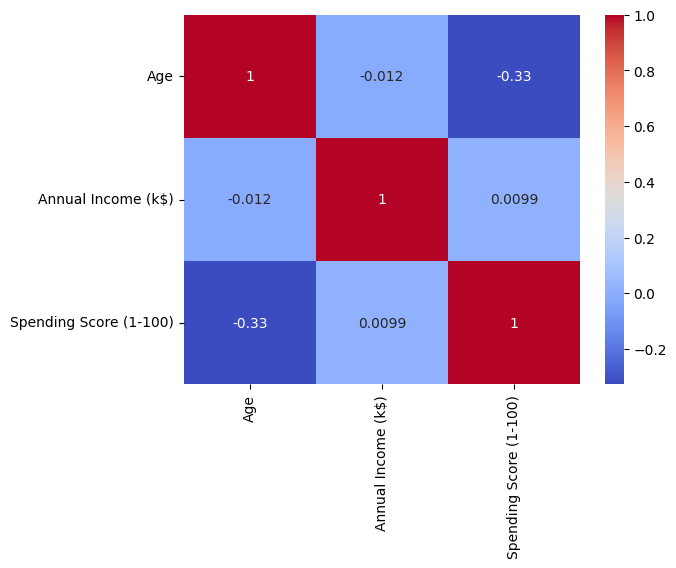

In [12]:
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

Based on the figure above we do not see any significant correlation between our variables.

## Clustering- Univariate, Bivariate, Multivariate

##Univariate clustering

In [13]:
inertia_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [14]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5081.484660267268,
 3976.3583638583646,
 2831.2960317460347,
 2268.8866755793233,
 1746.4707792207803]

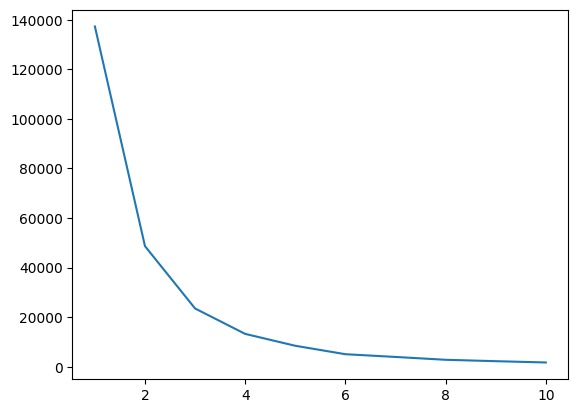

In [15]:
plt.plot(range(1,11),inertia_scores)

we can use three clusters.

In [16]:
clustering1=KMeans(n_clusters=3)
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [17]:
df['Income Cluster']=clustering1.labels_

In [18]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [19]:
df['Income Cluster'].value_counts()

2    90
1    74
0    36
Name: Income Cluster, dtype: int64

let's keep investigating

In [20]:
df.groupby('Income Cluster')['Age',	'Annual Income (k$)',	'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


###Bivariate clustering


In [21]:
inertia_scores2=[]
for i in range (1,11):
  kmeans2=KMeans(i)
  kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
  inertia_scores2.append(kmeans2.inertia_)

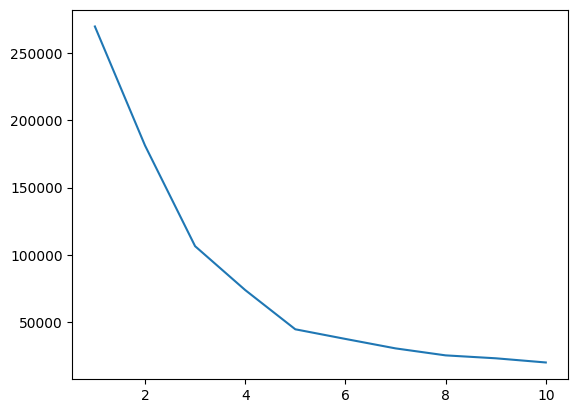

In [22]:
plt.plot(range(1,11),inertia_scores2)

In [23]:
clustering2=KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster']=clustering2.labels_

In [24]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,3
1,Male,21,15,81,1,4
2,Female,20,16,6,1,3
3,Female,23,16,77,1,4
4,Female,31,17,40,1,3


In [25]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

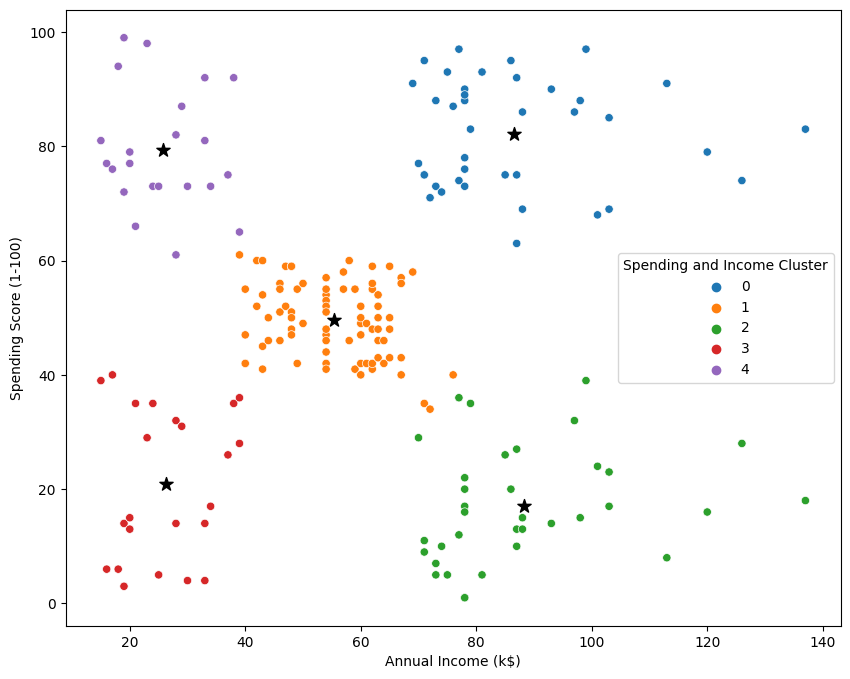

In [26]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')

Our 5 clusters can be easily identified in the scatterplot above!

In [27]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.592593,0.407407
2,0.457143,0.542857
3,0.608696,0.391304
4,0.590909,0.409091


In [28]:
df.groupby('Spending and Income Cluster')['Age',	'Annual Income (k$)',	'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,32.692308,86.538462,82.128205
1,42.716049,55.296296,49.518519
2,41.114286,88.200000,17.114286
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


We notice that cluster 2 has the lowest mean for age and annual income, whereas cluster 4 has the lowest mean for the speding score.

##Multivariate 

In [29]:
dff=pd.get_dummies(df,drop_first=True)
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [30]:
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,1,3,1
1,21,15,81,1,4,1
2,20,16,6,1,3,0
3,23,16,77,1,4,0
4,31,17,40,1,3,0


In [31]:
dff=dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]

In [32]:
scale=StandardScaler()
dff=pd.DataFrame(scale.fit_transform(dff))

In [33]:
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [34]:
inertia_scores3=[]
for i in range (1,11):
  kmeans3=KMeans(i)
  kmeans3.fit(dff)
  inertia_scores3.append(kmeans3.inertia_)

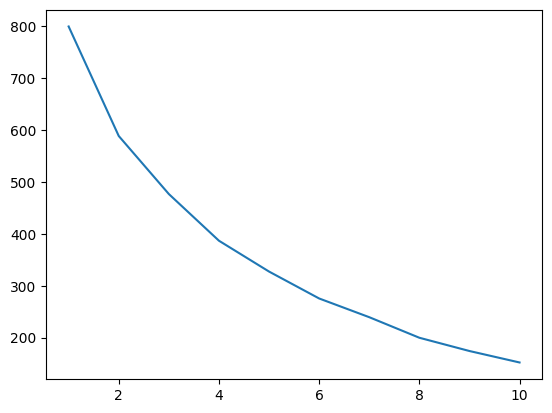

In [35]:
plt.plot(range(1,11),inertia_scores3)

We can consider 4 clusters in this case. However, we believe that 2 clusters are more telling so we consider bi-variate clustering.

Analysis: 

The target group would be cluster 1 which has a high spending score and high volume of income.

In this regard, 54 percent of cluster 1 shoppers are females. We should look for ways to attract these customers by using a suitable marketing compaign targeting popular items in this particular cluster.

Additionally, cluster 2 represents an important opportunity to market to the customers for sales event on popular items. 